# Assesing diad skewness
- This notebook uses the protocol of DeVitre et al. (in review) to assess diad skewness. This can be useful to identify liquid CO$_2$ in room temperature diad acqusitions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.41'

## Set path, and filetype

In [2]:
filetype='headless_txt'
import os
spectra_path=os.getcwd()
file_ext='.txt'
exclude_str=['Ne']
Diad_Files=pf.get_files(path=spectra_path, 
file_ext=file_ext, exclude_str=exclude_str)

Diad_Files

['G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR) (1).txt',
 'G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR).txt',
 'G170_004_2_4_10MW_1800G_5S_1ACC (CRR).txt',
 'G170_004_2_4_10MW_1800G_5S_5ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_3ACC (CRR).txt']

## Tweak fit for 1 file before you loop

In [3]:
filename=Diad_Files[0]
# Cut off intensity from peak to assess skewness
int_cut_off=0.3 
# Calculates absolute skewness, e.g., biggest possible value
skewness='abs'

In [4]:
diad1_config=pf.diad1_fit_config(upper_bck_diad1=(1330, 1350))
print(diad1_config)

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, fit_gauss=False, gauss_amp=1000, diad_sigma=0.2, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1330, 1350), diad_prom=100, HB_prom=20, x_range_baseline=75, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=20, return_other_params=False)


## Try these parameters for Diad1

,filename,Skewness_diad1,LHS_tie_diad1,RHS_tie_diad1
0,G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR) (1).txt,2.697283,1281.135853,1285.983107


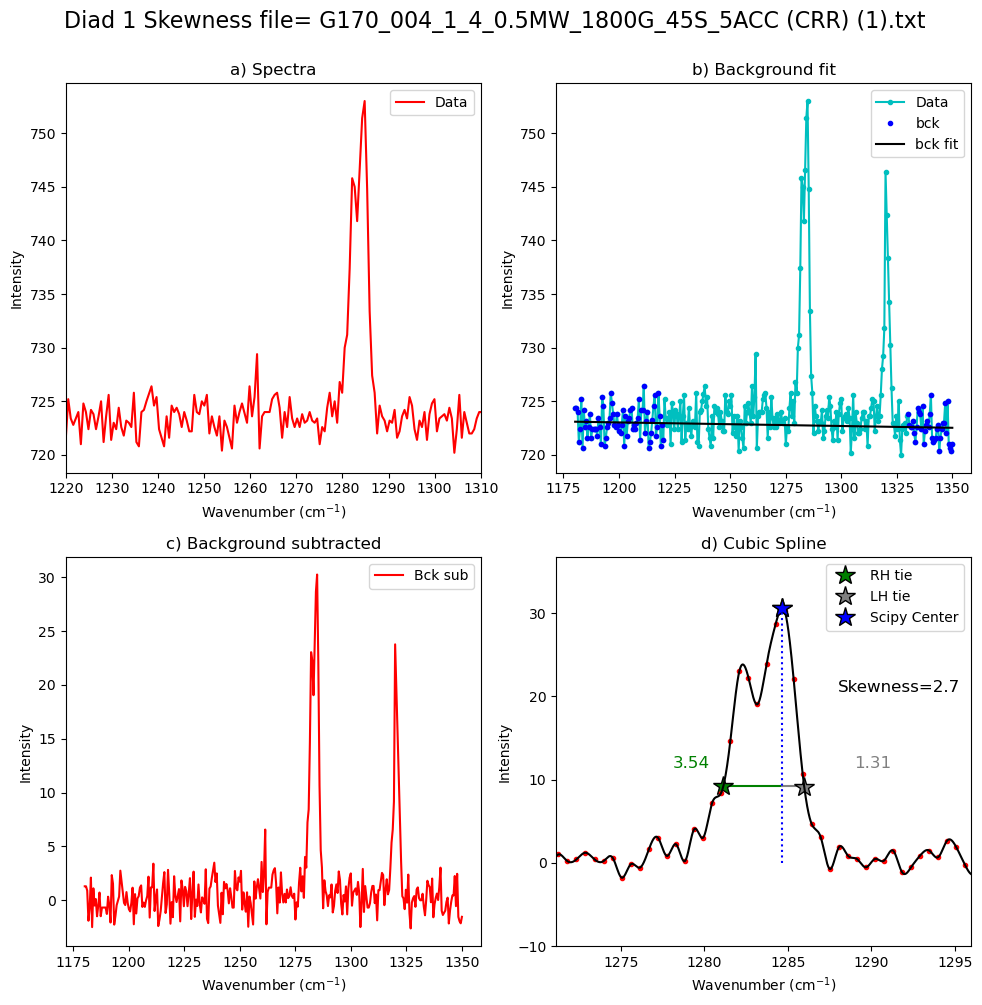

In [5]:
prominence=10 # prominence for Scipy find peaks
AR_test_diad1=pf.assess_diad1_skewness(config1=diad1_config,
int_cut_off=int_cut_off, 
skewness=skewness, path=spectra_path, filename=filename,
filetype=filetype, prominence=prominence)
AR_test_diad1



## Try these parameters for diad2

In [6]:
diad2_config=pf.diad2_fit_config(lower_bck_diad2=(1330, 1360))
print(diad2_config)

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, fit_gauss=False, gauss_amp=1000, diad_sigma=0.2, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, C13_sigma=0.1, C13_abs_prom=10, sigma_allowance=10, N_poly_bck_diad2=1, lower_bck_diad2=(1330, 1360), upper_bck_diad2=(1440, 1470), diad_prom=100, HB_prom=20, x_range_baseline=75, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=20, return_other_params=False)


,Skewness_diad2,LHS_tie_diad2,RHS_tie_diad2
0,2.037267,1385.54434,1388.961252


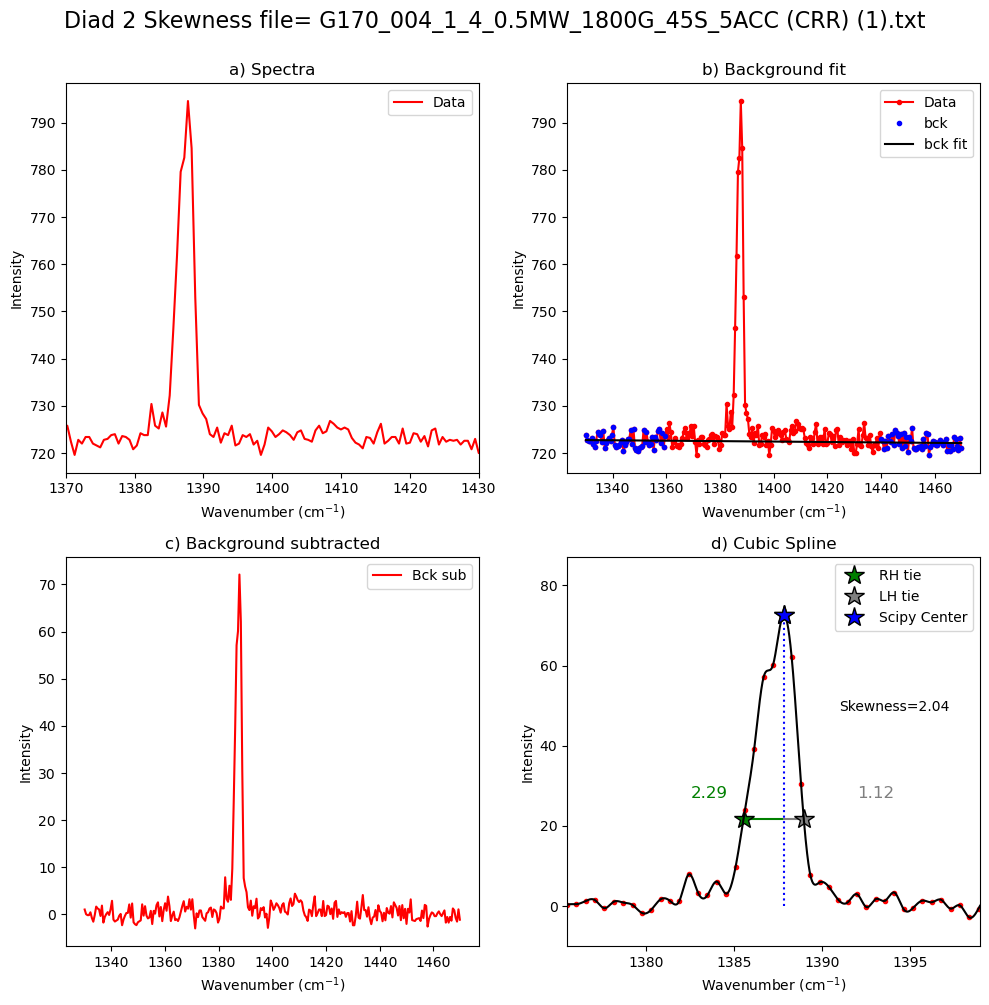

In [7]:
AR_test_diad2=pf.assess_diad2_skewness(config1=diad2_config, 
int_cut_off=int_cut_off, prominence=prominence,
skewness=skewness, path=spectra_path, filename=filename,
filetype=filetype)
AR_test_diad2

## Now lets loop through all the files

working on file #0
working on file #1
working on file #2
working on file #3
working on file #4
working on file #5


,filename,Skewness_diad1,Skewness_diad2,LHS_tie_diad1,RHS_tie_diad1,LHS_tie_diad2,RHS_tie_diad2
0,G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR) (1).txt,2.697283,2.037267,1281.135853,1285.983107,1385.544340,1388.961252
0,G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR).txt,2.681303,1.827020,1281.471667,1285.879649,1385.843407,1388.972432
0,G170_004_2_4_10MW_1800G_5S_1ACC (CRR).txt,1.075834,1.167500,1282.302722,1285.784672,1386.324151,1388.747433
0,G170_004_2_4_10MW_1800G_5S_5ACC (CRR).txt,1.036585,1.041332,1281.980476,1285.379321,1386.062816,1388.547589
0,G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt,1.246673,1.405337,1281.994044,1285.716831,1386.076792,1388.722277
0,G170_004_2_4_5MW_1800G_10S_3ACC (CRR).txt,2.353796,1.616774,1281.763384,1285.284343,1385.944028,1388.778178


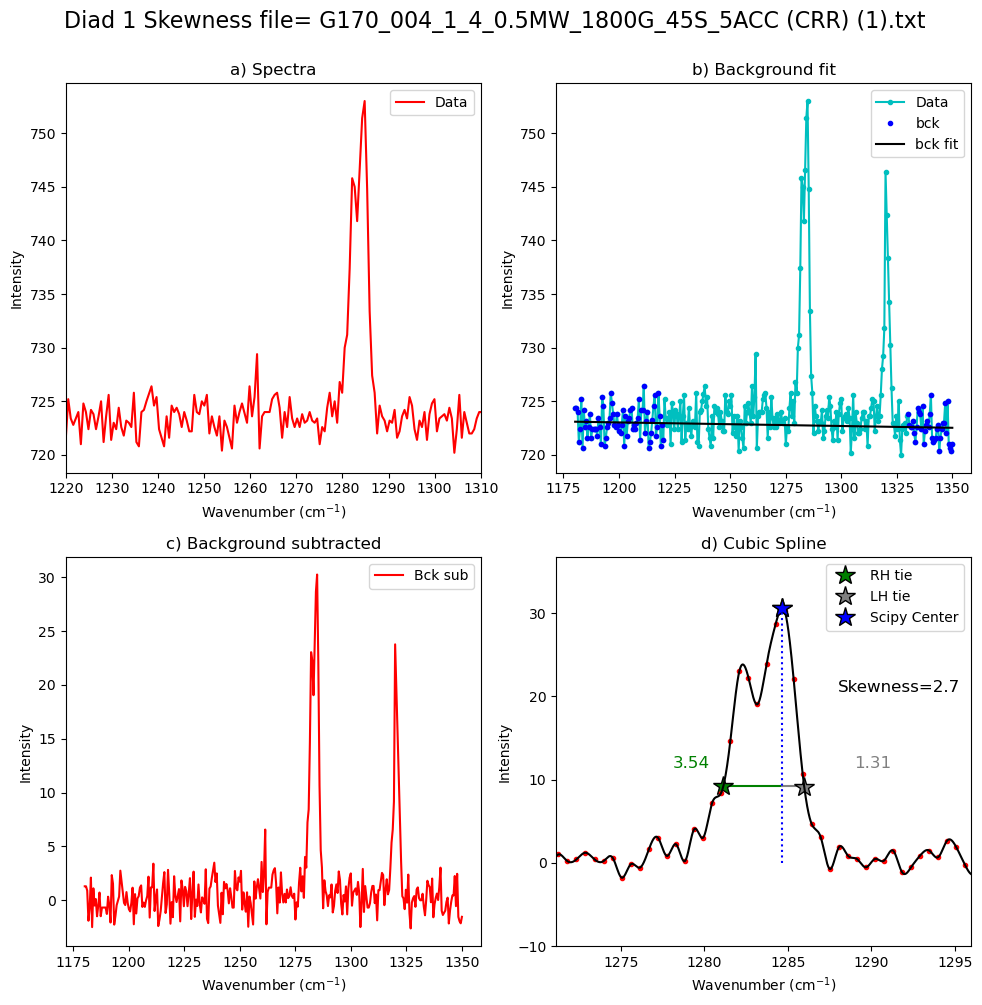

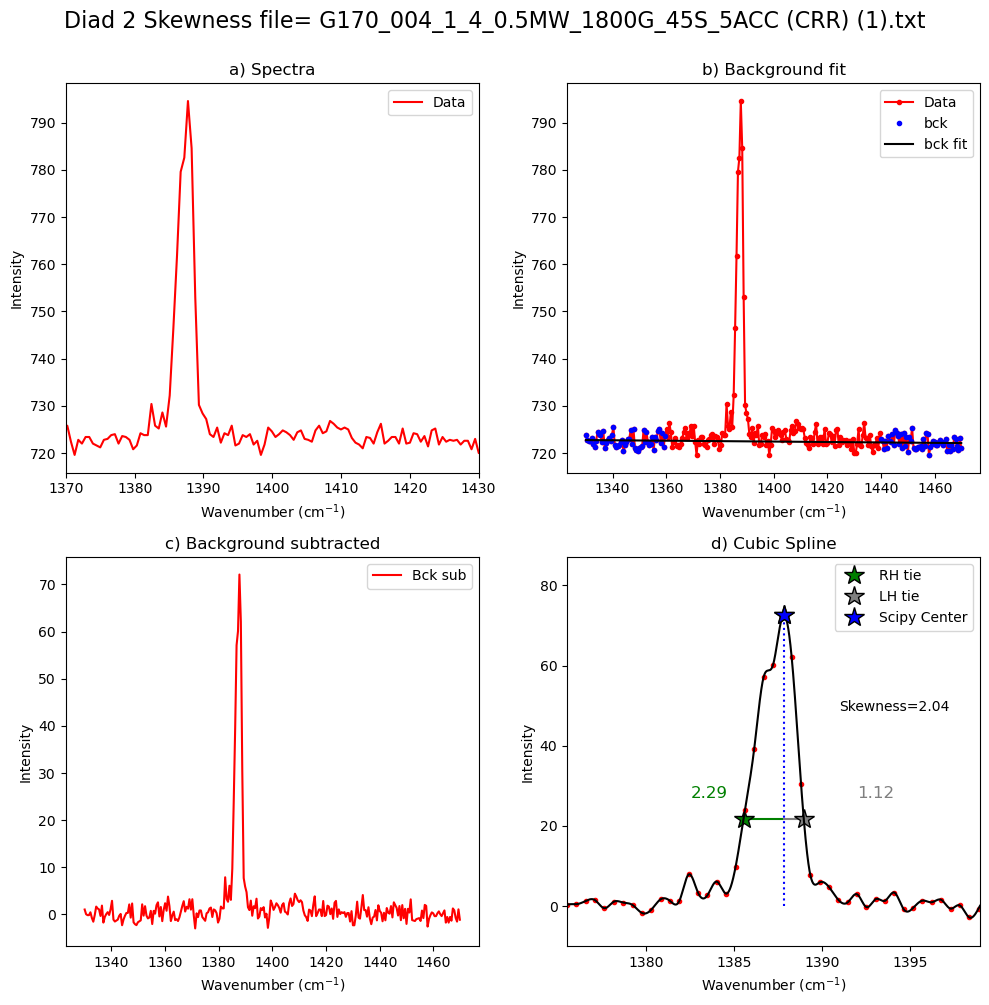

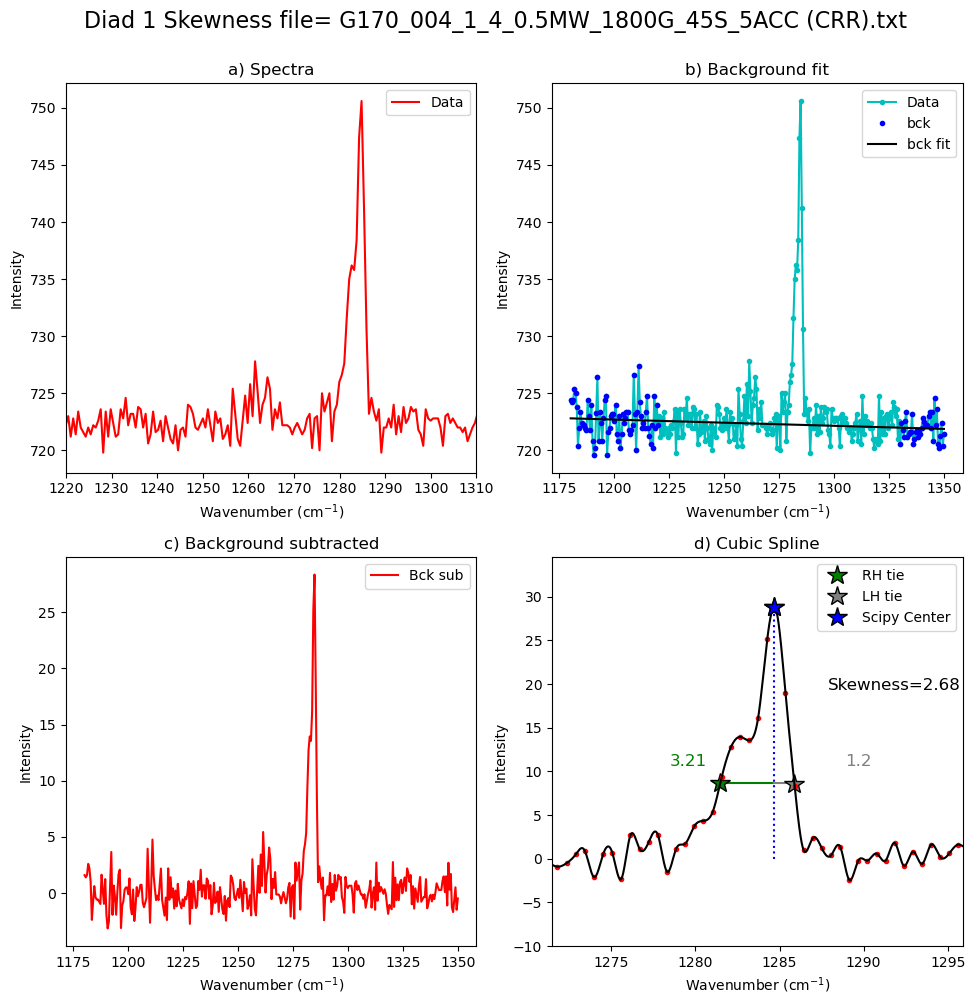

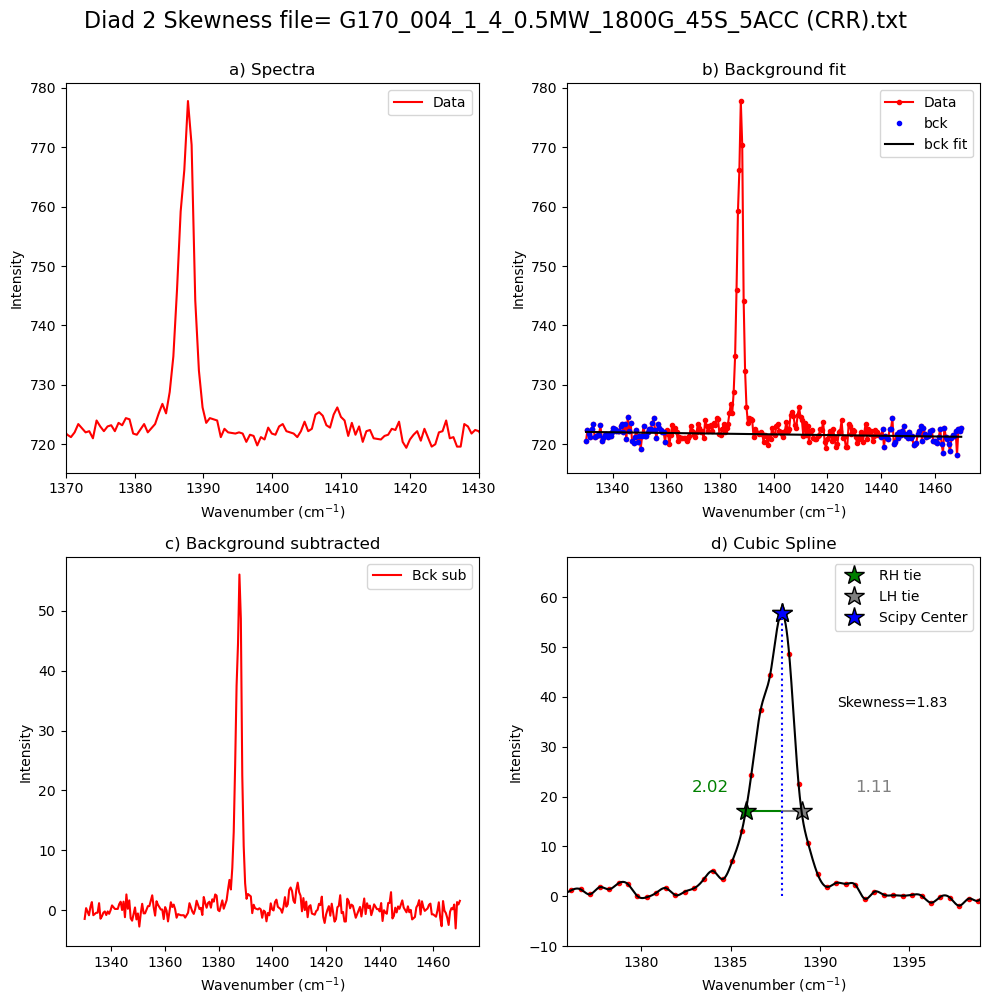

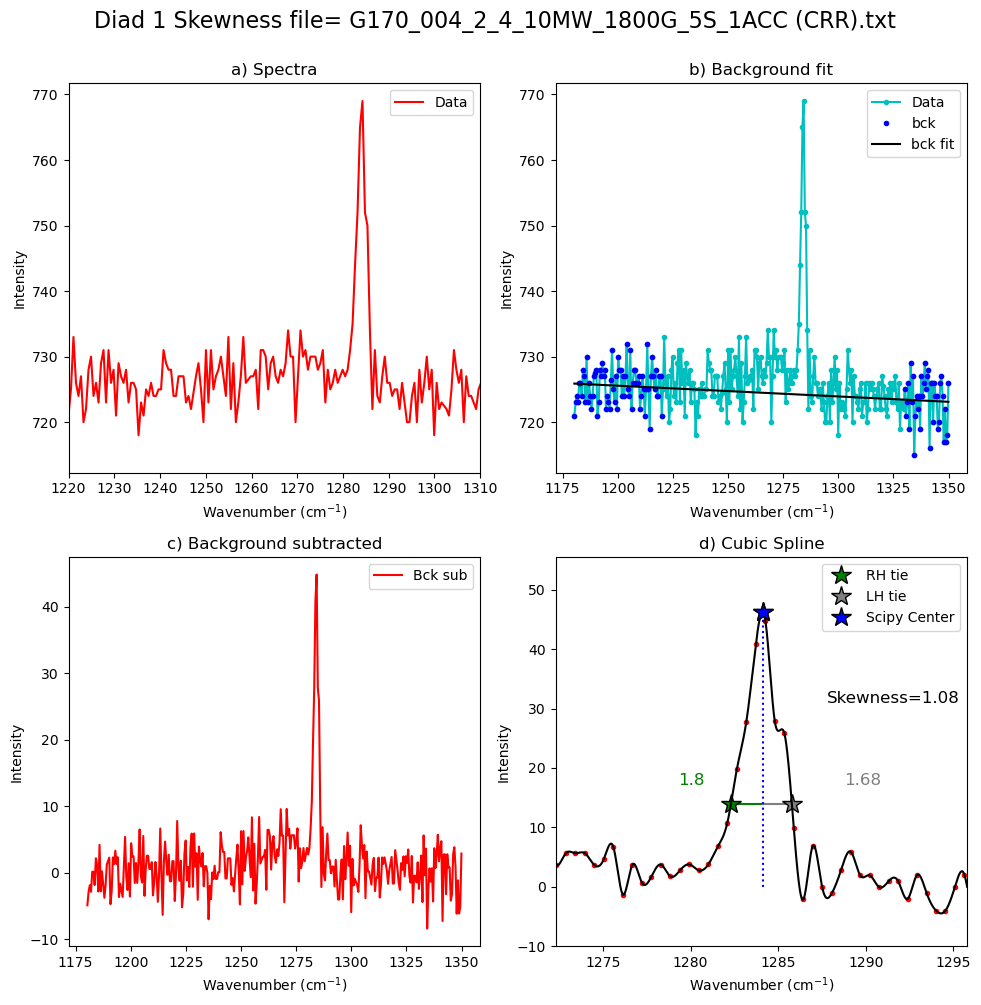

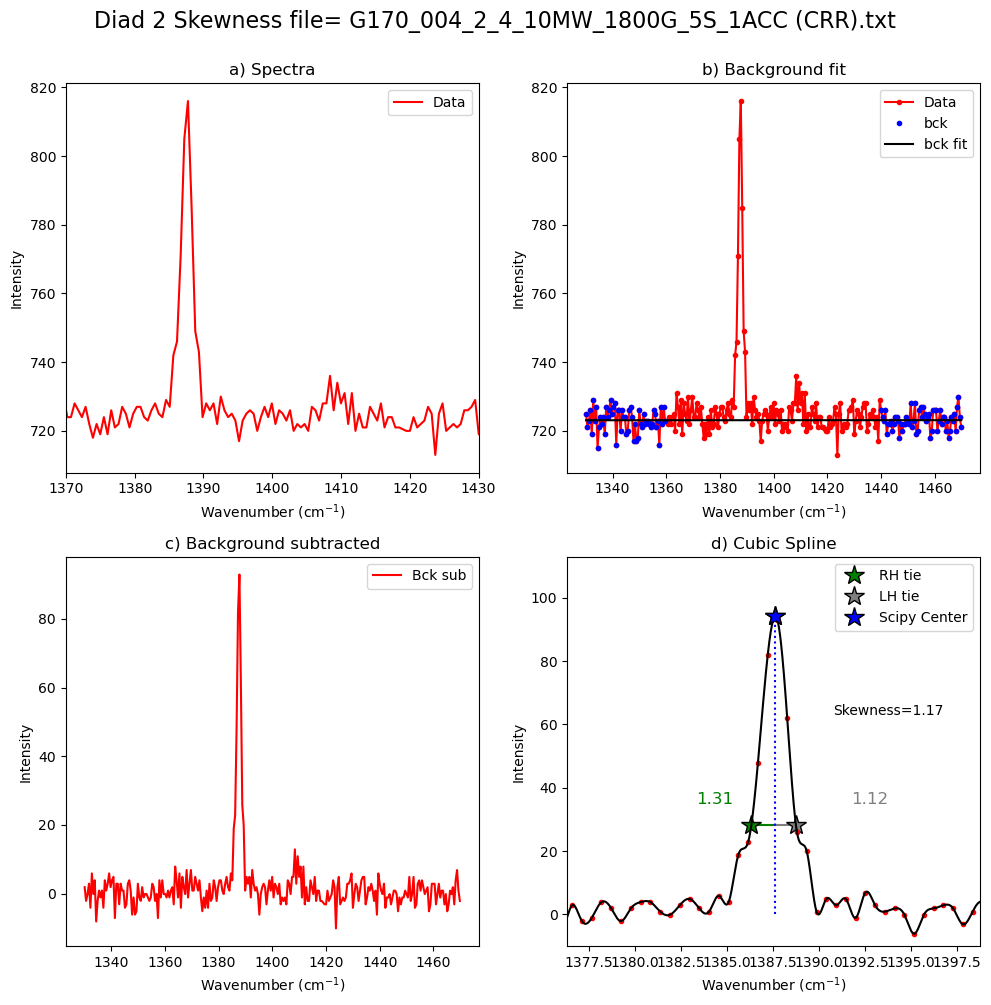

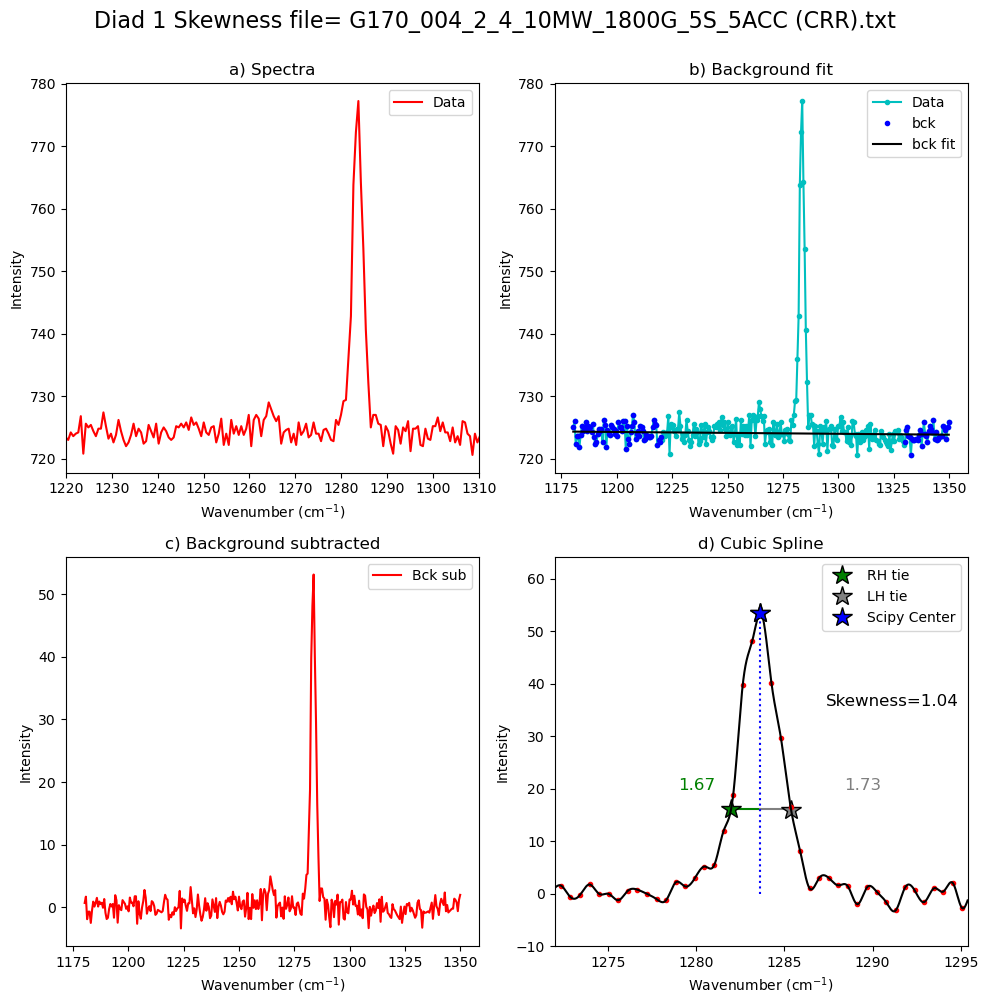

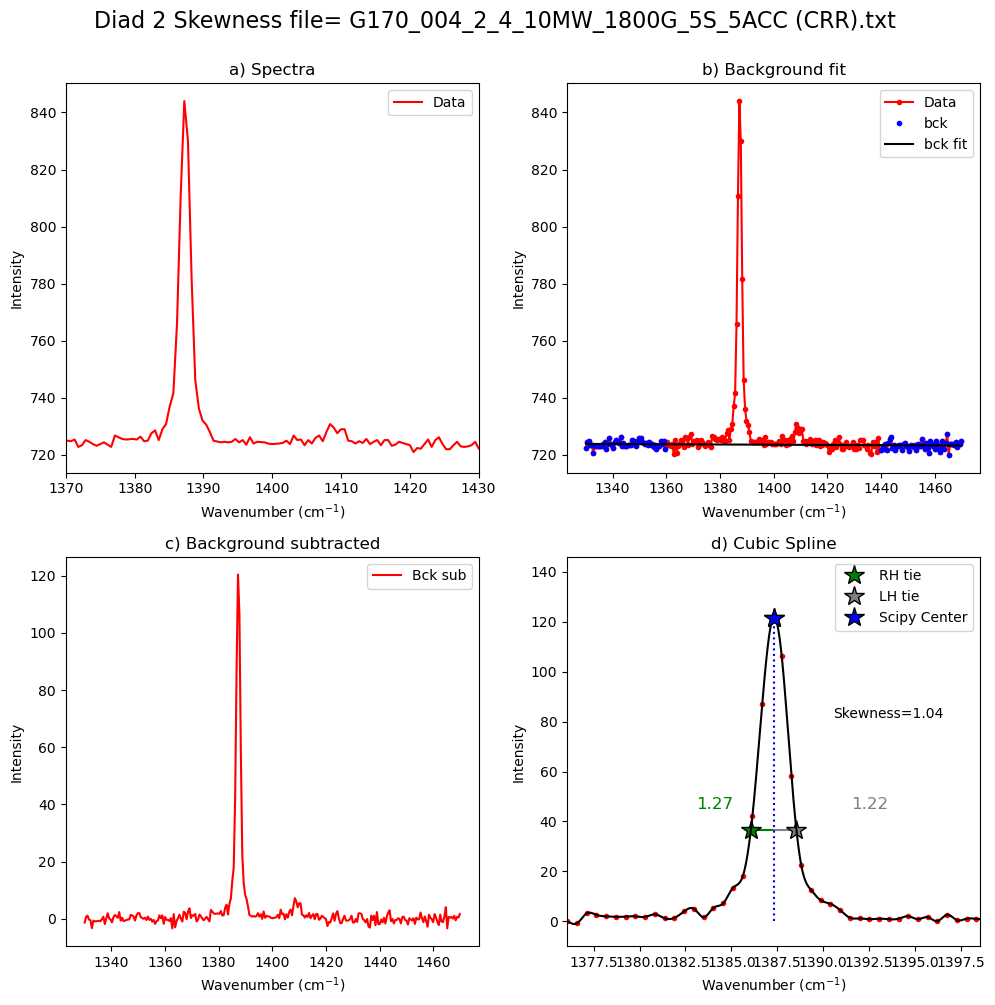

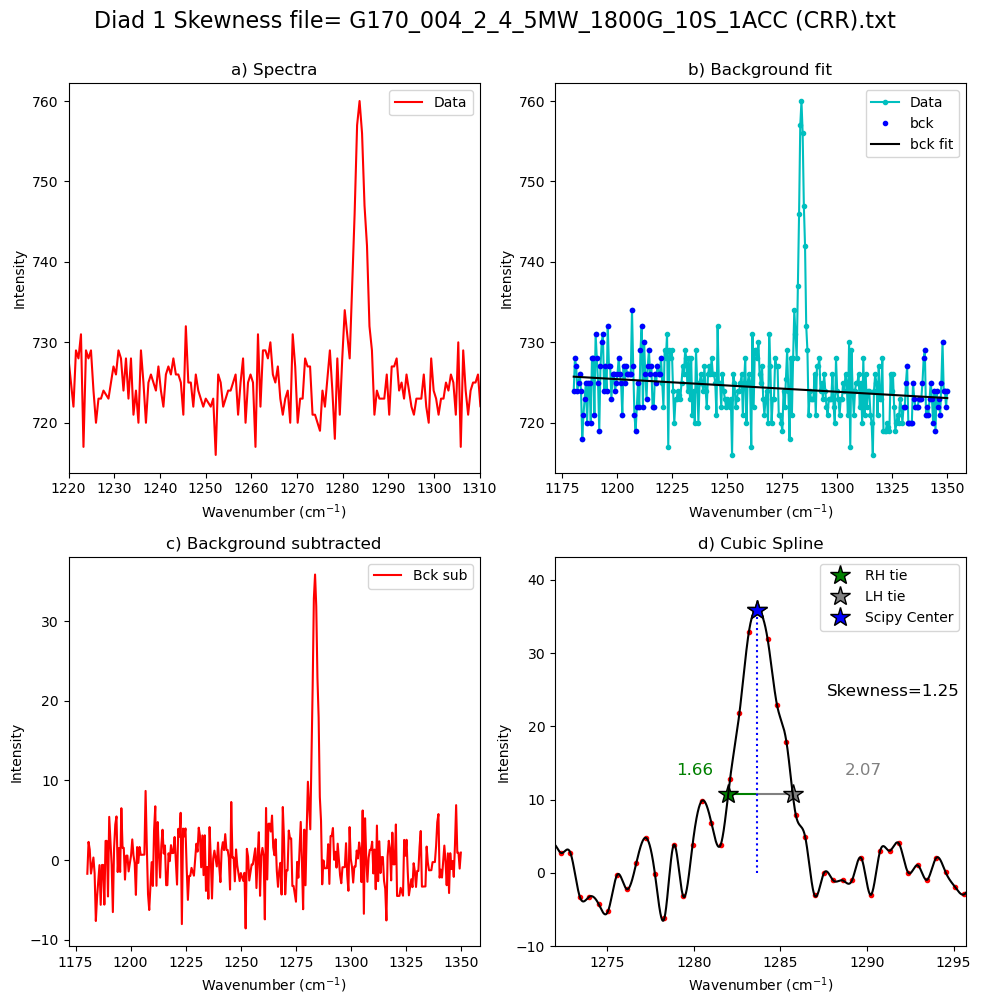

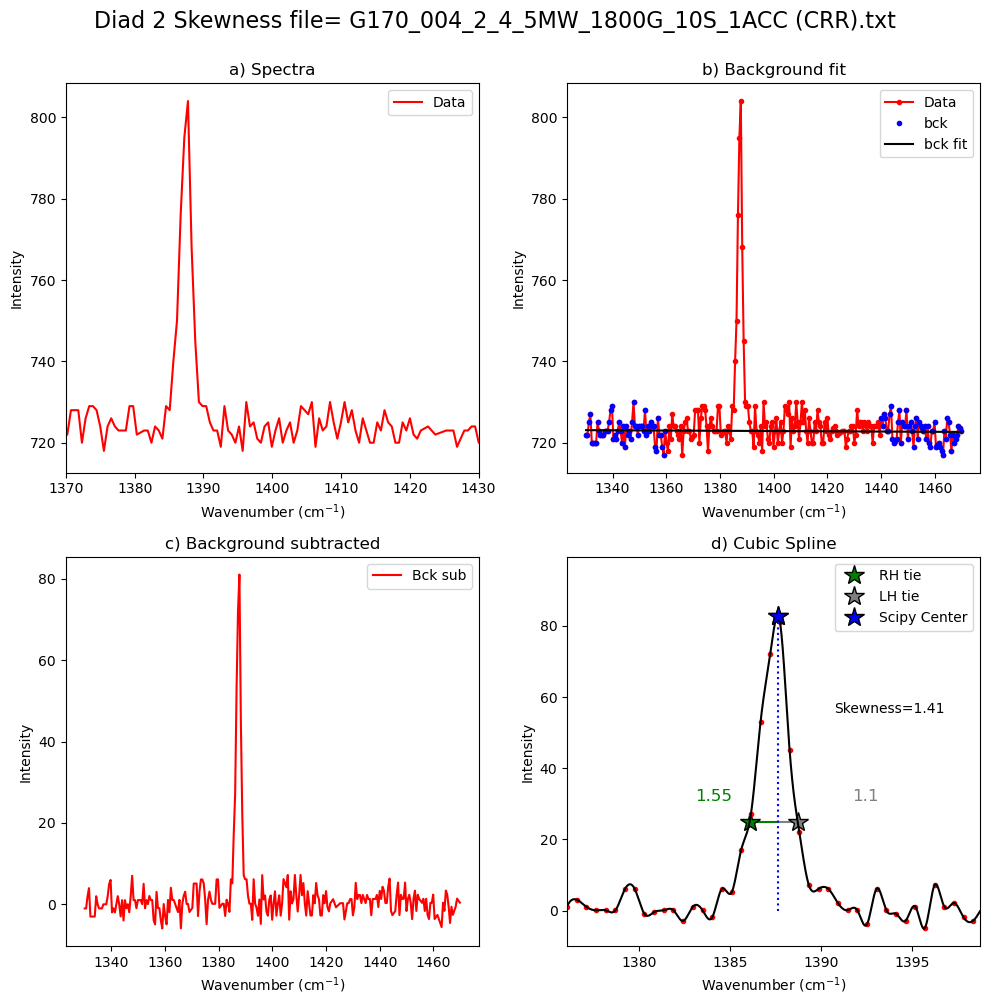

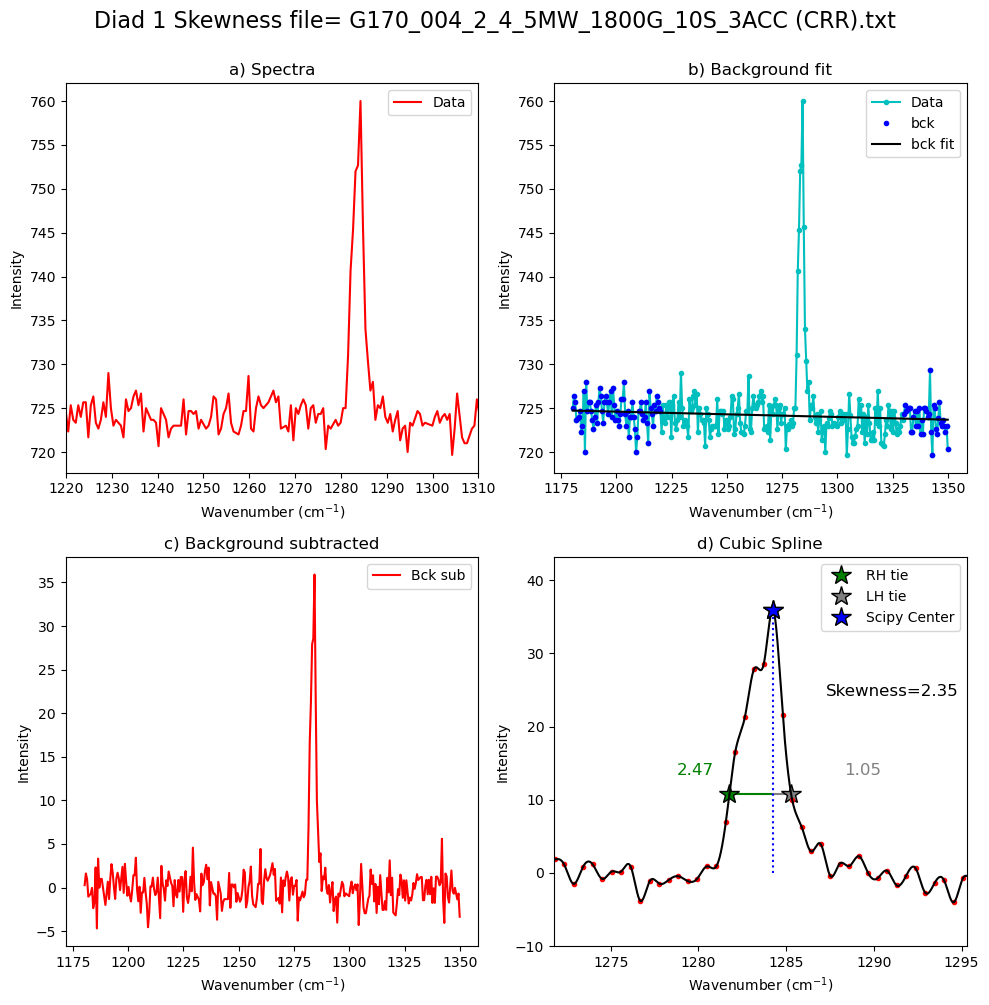

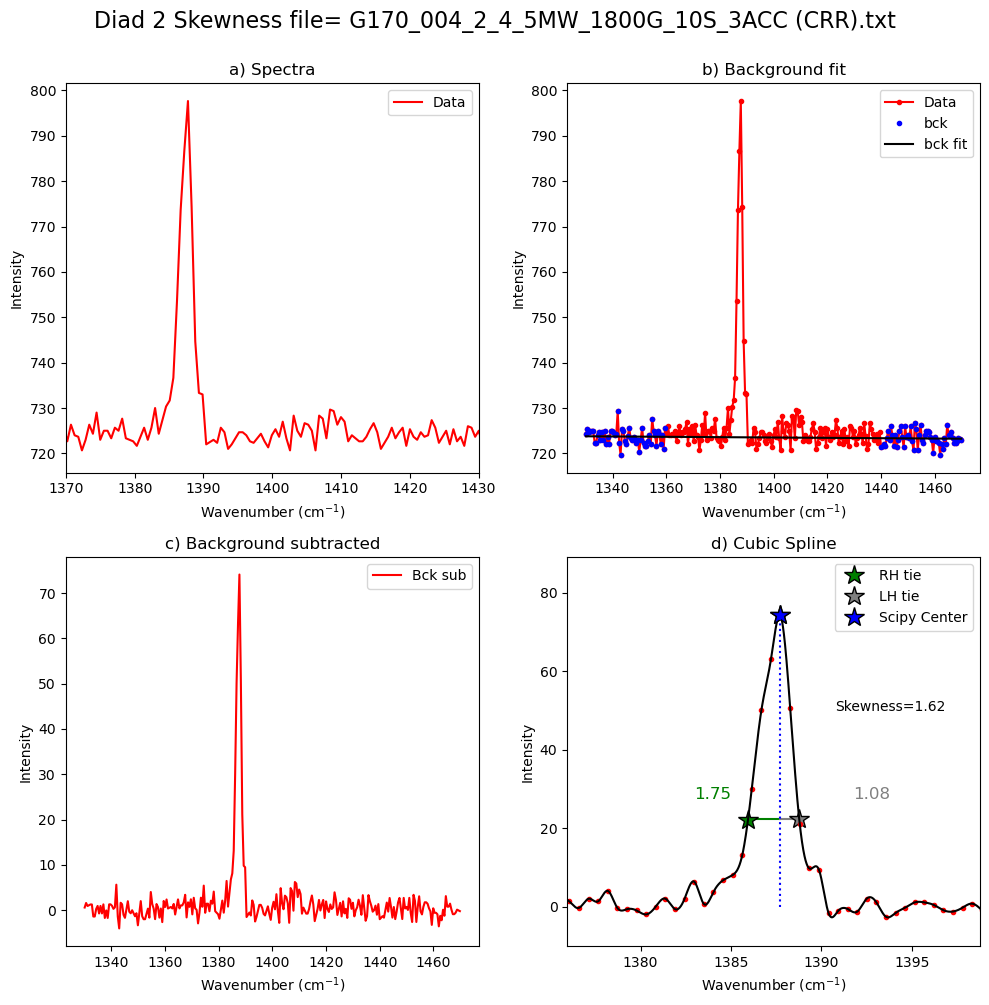

In [8]:
df_combo=pf.loop_diad_skewness(Diad_files=Diad_Files,
path=spectra_path, skewness=skewness, prominence=prominence,
filetype=filetype,
file_ext='.txt',config_diad1=diad1_config, config_diad2=diad2_config, 
int_cut_off=0.3)
df_combo

In [9]:
df_combo

,filename,Skewness_diad1,Skewness_diad2,LHS_tie_diad1,RHS_tie_diad1,LHS_tie_diad2,RHS_tie_diad2
0,G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR) (1).txt,2.697283,2.037267,1281.135853,1285.983107,1385.544340,1388.961252
0,G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR).txt,2.681303,1.827020,1281.471667,1285.879649,1385.843407,1388.972432
0,G170_004_2_4_10MW_1800G_5S_1ACC (CRR).txt,1.075834,1.167500,1282.302722,1285.784672,1386.324151,1388.747433
0,G170_004_2_4_10MW_1800G_5S_5ACC (CRR).txt,1.036585,1.041332,1281.980476,1285.379321,1386.062816,1388.547589
0,G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt,1.246673,1.405337,1281.994044,1285.716831,1386.076792,1388.722277
0,G170_004_2_4_5MW_1800G_10S_3ACC (CRR).txt,2.353796,1.616774,1281.763384,1285.284343,1385.944028,1388.778178
